In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import c_writer
from os.path import join
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### Load Shapley heat map images and run some preprocessing
#### greyscale, normalize, and flatten features

In [ ]:
img_height = 28
img_width = 28
data_dir = 'dataset'
batch_size = 32

images = []
labels = []

# Load images and labels
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        class_label = 0 if class_name == 'normal' else 1
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(class_label)


images = np.array(images)
labels = np.array(labels)

# Flatten and normalize the images
images = images.reshape((images.shape[0], -1))
# images = images / 255.0

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=123)

x_test_copy = x_test.copy()
y_test_copy = y_test.copy()

In [ ]:
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [ ]:
type(x_train[0][0])

numpy.float64

In [ ]:
type(x_test[0][0])

numpy.float64

In [ ]:
x_train.shape

(160, 784)

In [ ]:
x_test.shape

(40, 784)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
x_train[0]

array([ 83.,  82.,  82.,  82.,  82.,  82.,  82.,  82.,  80.,  87.,  79.,
        79.,  84.,  80.,  83.,  81.,  83.,  82.,  82.,  81.,  83.,  83.,
        81.,  82.,  83.,  82.,  82.,  82.,  81.,  82.,  82.,  82.,  82.,
        82.,  82.,  82.,  82.,  80.,  82.,  86.,  80.,  80.,  83.,  83.,
        83.,  82.,  82.,  81.,  83.,  83.,  81.,  84.,  82.,  82.,  82.,
        82.,  82.,  82.,  82.,  82.,  83.,  82.,  82.,  82.,  81.,  82.,
        81.,  81.,  81.,  85.,  81.,  83.,  82.,  83.,  84.,  85.,  85.,
        82.,  79.,  81.,  82.,  82.,  82.,  82.,  82.,  82.,  82.,  82.,
        82.,  82.,  81.,  81.,  84.,  84.,  83.,  86.,  88.,  84.,  81.,
        88.,  92.,  92.,  88.,  85.,  84.,  83.,  83.,  83.,  82.,  82.,
        82.,  82.,  82.,  82.,  81.,  81.,  81.,  81.,  82.,  82.,  81.,
        86.,  89.,  85.,  77.,  78.,  91.,  84.,  90.,  93.,  88.,  84.,
        83.,  83.,  84.,  80.,  82.,  82.,  82.,  82.,  82.,  82.,  81.,
        81.,  82.,  83.,  84.,  85.,  86.,  98., 10

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train[0]

array([ 7.23664950e-01,  7.00979603e-01,  6.94542151e-01,  7.00725317e-01,
        6.97274401e-01,  6.97285719e-01,  7.00338702e-01,  6.99595196e-01,
        6.44408836e-01,  8.23778200e-01,  6.25768251e-01,  6.23491039e-01,
        7.54316466e-01,  6.46375333e-01,  7.24343607e-01,  6.69071131e-01,
        7.25140554e-01,  6.98405351e-01,  6.99761902e-01,  6.74418605e-01,
        7.25081562e-01,  7.27884249e-01,  6.73844857e-01,  6.95268121e-01,
        7.24718051e-01,  6.97902441e-01,  6.99092387e-01,  6.99840891e-01,
        6.79040491e-01,  6.80605633e-01,  7.06884804e-01,  7.00194566e-01,
        6.98633979e-01,  6.99997327e-01,  6.99481612e-01,  6.94836200e-01,
        7.03650108e-01,  6.46747186e-01,  6.96693749e-01,  7.93659546e-01,
        6.41453676e-01,  6.48491273e-01,  7.31769595e-01,  7.22655045e-01,
        7.26123235e-01,  6.99427376e-01,  6.96579849e-01,  6.65193245e-01,
        7.18782034e-01,  7.25840607e-01,  6.73679631e-01,  7.54318641e-01,
        7.01315296e-01,  

### Trying to minimize the number of features

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
# Using PCA to reduce the number of dimensions
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

colors = ['red', 'blue']
cmap = ListedColormap(colors)

pca = PCA(n_components=2)
PCA_X_train_2d = pca.fit_transform(x_train)

PCA_X_test_2d = pca.fit_transform(x_test)

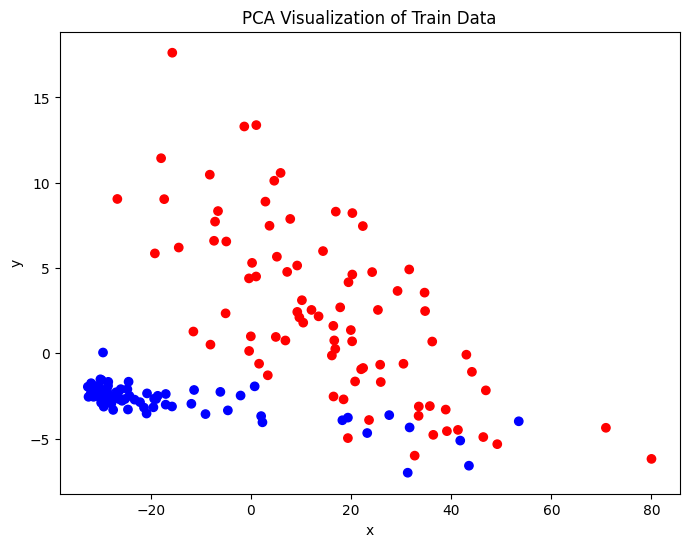

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(PCA_X_train_2d[:, 0], PCA_X_train_2d[:, 1], c = y_train, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.title('PCA Visualization of Train Data')
plt.show()

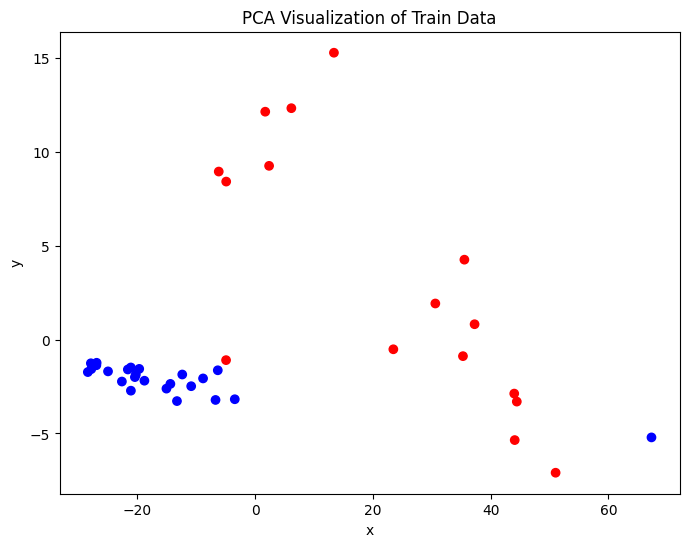

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(PCA_X_test_2d[:, 0], PCA_X_test_2d[:, 1], c = y_test, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.title('PCA Visualization of Train Data')
plt.show()

In [ ]:
PCA_X_train_2d.shape

(160, 2)

In [ ]:
PCA_X_test_2d.shape

(40, 2)

In [ ]:
type(y_test[0][0])

numpy.int64

In [ ]:
y_train.shape

(160, 1)

In [ ]:
y_test.shape

(40, 1)

### Define and train a simple DNN for anomaly detection (similar to HW 2)

In [ ]:
PCA_X_train_2d.shape[1:]

(2,)

In [ ]:
num_classes = 2

model = models.Sequential([
    layers.Dense(20, activation='relu', input_shape = PCA_X_train_2d.shape[1:]),
    layers.Dense(10, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 292 (1.14 KB)
Trainable params: 292 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    PCA_X_train_2d, y_train,
    validation_data=(PCA_X_test_2d, y_test),
    epochs=50,
    batch_size=batch_size
)


Epoch 1/50
5/5 [==============================] - 2s 59ms/step - loss: 3.3634 - accuracy: 0.2062 - val_loss: 2.9318 - val_accuracy: 0.1500
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 2.5967 - accuracy: 0.2188 - val_loss: 2.1659 - val_accuracy: 0.2250
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 1.9440 - accuracy: 0.3438 - val_loss: 1.5786 - val_accuracy: 0.4250
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 1.4462 - accuracy: 0.5188 - val_loss: 1.1243 - val_accuracy: 0.4250
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9906 - accuracy: 0.5312 - val_loss: 0.7658 - val_accuracy: 0.5750
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6600 - accuracy: 0.6250 - val_loss: 0.5077 - val_accuracy: 0.8000
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.4569 - accuracy: 0.8938 - val_loss: 0.3594 - val_accuracy: 0.9500
Epoch 8/50
5/5 [=================

### Evaluate accuracy using classification report and confusion matrix

In [ ]:
loss, accuracy = model.evaluate(PCA_X_test_2d, y_test)
print(f'Test accuracy: {accuracy:.2f}')

2/2 [==============================] - 0s 6ms/step - loss: 0.1747 - accuracy: 0.9500
Test accuracy: 0.95


In [ ]:
y_pred = np.argmax(model.predict(PCA_X_test_2d), axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      0.96      0.96        24

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:
[[15  1]
 [ 1 23]]


In [ ]:
model.save('base_trigger_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Implementing Dynamic Range Quantization to run on Arduino

#### Same method as HW 2

In [ ]:
base_model = tf.keras.models.load_model('base_trigger_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(base_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
# Save the quantized model
with open('quantized_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)

# Get the file sizes
original_model_size = os.path.getsize('base_trigger_model.h5')
quantized_model_size = os.path.getsize('quantized_model.tflite')

# Print the model sizes
print(f"Original model size: {original_model_size / 1024:.2f} KB")
print(f"Quantized model size: {quantized_model_size / 1024:.2f} KB")

Original model size: 33.44 KB
Quantized model size: 3.19 KB


### Evaluate quantized model accuracy using classification report and confusion matrix

In [ ]:
interpreter = tf.lite.Interpreter(model_path="quantized_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def predict_tflite(input_data):
    input_data = np.expand_dims(input_data, axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

y_pred_quant = []
for data in PCA_X_test_2d:
    pred = predict_tflite(data)
    y_pred_quant.append(np.argmax(pred))

print(classification_report(y_test, y_pred_quant))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_quant))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      0.96      0.96        24

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:
[[15  1]
 [ 1 23]]


## Convert quantized model to C and create the header file
#### (Same method as HW 2)

In [ ]:
# c_writer is a py file in the same folder and has been imported at the beginning of the notebook
# Reference : https://github.com/ShawnHymel/tinyml-example-anomaly-detection/blob/master/utils/c_writer.py
# We use #04x to pad the output to 2 digits with a 0x prefix
hex_array = [format(val, '#04x') for val in tflite_quant_model]
# Calling function to convert an array into a C string (requires Numpy)
# create_array(np_array, var_type, var_name, line_limit=80, indent=4)
c_model = c_writer.create_array(np.array(hex_array), 'unsigned char', "network_model")
# Calling Function to create a header file with given C code as a string
header_str = c_writer.create_header(c_model, "network_model")

In [ ]:
#Writing to the header file
with open('network_model.h', 'w') as file:
    file.write(header_str)

### Generate sample Shapley heat maps to run on Arduino

In [ ]:
type(x_test[0,0])

numpy.float64

In [ ]:
x_test.shape

(40, 50)

In [ ]:
y_test.shape

(40, 1)

In [ ]:
# Converting a sample piece of the X test and y test data to C (for the purpose of ino code (arduino) to load and test
# the sample and compare

Xtest = PCA_X_test_2d[0:40,:]
print(c_writer.create_array(Xtest,"float","X_test"))

const unsigned int X_test_dim1 = 40;
const unsigned int X_test_dim2 = 2;

const float X_test[40][2] = {
    -4.955228546128512, -1.0907715856529432, -20.440108923882583, 
    -1.9957716106741101, -4.9323076001491595, 8.426665643178348, 
    -21.11894200922196, -2.719574275875209, 51.020075722841604, 
    -7.09297055843539, -3.47329447678659, -3.1760334007639144, 
    -14.411442699367562, -2.358050565647164, 2.3547520942415425, 
    9.265458488157034, -12.395531290103705, -1.8574670985079802, 
    -27.91850690787095, -1.2585040122776825, 37.25761294073588, 
    0.8223521178776451, -18.822484616532957, -2.1879644390903983, 
    -26.939319242097444, -1.2319654153574593, -27.848247241155736, 
    -1.567937386910336, -28.433438861976576, -1.7277955508335339, 
    43.99200498682703, -2.8746152456862837, 35.2844392260505, 
    -0.878729349434378, -21.129275799778394, -1.481993850613591, 
    -20.280699812292735, -1.865196982383144, 30.590517681003856, 
    1.9278573040794207, -26.983349902483

In [ ]:
ytest = y_test[0:40]
print(c_writer.create_array(ytest,"uint8_t","y_test"))

const unsigned int y_test_dim1 = 40;
const unsigned int y_test_dim2 = 1;

const uint8_t y_test[40][1] = {
    0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 
    0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1
};

